# Linear Regression - Bike sharing

## Objective: Build a Multiple Linear Regression model to predict the demand for shared bikes.

#### Boombikes wants to understand the factors affecting the demand for shared bikes in the American market. 
#### Specifically, the company wants to know:

- Which variables are significant in predicting the demand for shared bikes?
- How well those variables describe the bike demands?

In [1]:
# Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import sklearn

## Data Understanding, initial cleaning

In [2]:
bike = pd.read_csv("day.csv")
bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [3]:
bike.tail(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
720,721,22-12-2019,1,1,12,0,6,0,1,10.899153,11.80565,44.1250,27.292182,205,1544,1749
721,722,23-12-2019,1,1,12,0,0,0,1,10.079153,12.97355,51.5417,8.916561,408,1379,1787
722,723,24-12-2019,1,1,12,0,1,1,2,9.483464,12.94500,79.1304,5.174437,174,746,920
723,724,25-12-2019,1,1,12,1,2,0,2,11.943464,14.72325,73.4783,11.304642,440,573,1013
724,725,26-12-2019,1,1,12,0,3,1,3,9.976653,11.01665,82.3333,21.208582,9,432,441
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [4]:
bike.shape

(730, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


#### Observations:
- There are 730 rows and 16 columns. The 730 rows correspond to 2 years worth of data (365 * 2), presumably from 2018 & 2019.
- There is some doubt whether this data is actually from 2018 & 2019. The reason for this is that weekends ("workingday" = 0) in this dataset are assigned to Monday and Tuesday, while weekdays ("workingday" = 1) are from Wednesday to Sunday.
- For instance, 08-01-2018 was actually a Monday, but it is flagged as a non-working day in this dataset with weekday no. 6. Value of weekdays range from 0 to 6 for the seven days of the week.
- Conventional wisdom would suggest that week would start on Sunday with weekday 0 being assigned to it and end on Saturday. However, for this dataset, week starts on Tuesdays which is assigned a weekday value of 0.
- One plausible explanation is that this data is not from 2018-19, but from earlier years.

#### Moving forward with the assumption that this data is from an alternate universe where the week officially starts on a Tuesday (weekday = 0) and the normal working days are from Wednesday to Sunday (with Mon and Tue being what we, in our universe, treat as weekends.)

In [6]:
# Checking for null values.
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No null values in the dataset to take care of.

### Elimination of variables which are quite clearly not useful.

Variable "instant" is quite clearly an index and can be safely dropped.

In [7]:
# Variables "casual","registered" and "cnt"
bike["count_chk"]=bike.casual + bike.registered - bike.cnt
bike["count_chk"].value_counts()

0    730
Name: count_chk, dtype: int64

This verifies that the total count 'cnt' of users is exactly equal to the sum of "casual" and "registered" users.
#### Since we are only interested in the total demand of shared bikes, for our analysis we can ignore whether the users were "casual" or "registered".

In [8]:
# Variable "dteday"
print(bike.iloc[360:370],"\n")
print(bike.mnth.value_counts(),"\n")
print(bike.yr.value_counts())

     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
360      361  27-12-2018       1   0    12        0        2           1   
361      362  28-12-2018       1   0    12        0        3           1   
362      363  29-12-2018       1   0    12        0        4           1   
363      364  30-12-2018       1   0    12        0        5           1   
364      365  31-12-2018       1   0    12        0        6           0   
365      366  01-01-2019       1   1     1        0        0           0   
366      367  02-01-2019       1   1     1        1        1           0   
367      368  03-01-2019       1   1     1        0        2           1   
368      369  04-01-2019       1   1     1        0        3           1   
369      370  05-01-2019       1   1     1        0        4           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
360           2  13.325000  16.38165  76.2500  12.626150     103        1059   
361

The above output clearly shows that the year information is already available in the "yr" column. The "mnth" column is also accurate based on the value_counts for the number of days in each month over 2 years. Information on working days, weekday/weekend and holidays are already available in other columns.
Hence, there is no real value that can be obtained from the date column "dteday" and can be safely dropped.

In [9]:
# First list of variables to be dropped
drop_list1=["instant","casual","registered","count_chk","dteday"]

In [10]:
# Drop the variables that are not required.
bike.drop(drop_list1,axis=1,inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
bike.shape

(730, 12)

#### We are left with 11 independent predictor variables. Our target / dependent variable is "cnt".

In [12]:
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


- It is clear from the values above as well as the description of the columns that the first seven variables in the above dataframe are categorical variables masquerading as numeric variables. 
- It may be better to convert the values of the non-binary categorical variables to their actual values for better data representation.
- This is also important because these variables are not ordered and their values do not have a rank as such

#### Categorical variables which are already in binary format: 
- "yr": 0 = 2018, 1 = 2019
- "holiday" and "workingday": 0 = "no", 1 = "yes"

No operations do be done on these.

#### Categorical variables which are to be converted into their actual values, before dummy variable creation
- "season":- 1:spring, 2:summer, 3:fall, 4:winter
- "mnth":- Jan to Dec
- "weekday":- 0:Tue, 1: Wed .... 6: Mon
- "weathersit": 
    - 1: Pleasant (Clear, Few clouds, Partly cloudy, Partly cloudy)
    - 2: Misty (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)
    - 3: Unfavourable (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)
    - 4: Inclement (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)

These will be converted to their actual values before being assigned to dummy variables.

In [13]:
# Variable "season" conversion
# 1:spring, 2:summer, 3:fall, 4:winter
seasons = ["spring", "summer", "fall", "winter"]
bike.season = bike.season.apply(lambda x : seasons[x-1])

In [14]:
# Variable "mnth" conversion
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
bike.mnth = bike.mnth.apply(lambda x : months[x-1])

In [15]:
# Variable "weekday" conversion
# As mentioned earlier, the start of the week is Tuesday with weekday number 0
days = ["Tue","Wed","Thu","Fri","Sat","Sun","Mon"]
bike.weekday = bike.weekday.apply(lambda x : days[x])

In [16]:
# Variable "weathersit" conversion
weather = ["Pleasant","Misty","Unfavourable","Inclement"]
bike.weathersit = bike.weathersit.apply(lambda x: weather[x-1])

In [17]:
# Check dataframe now.
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Pleasant,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Pleasant,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Pleasant,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
list(bike.columns)

['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'cnt']

In [19]:
# Creating a list of categorical and numeric variables for easier analysis
cat_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
num_vars =[ 'temp', 'atemp', 'hum', 'windspeed',"cnt"]

### Visualizing numeric variables

<Figure size 1440x864 with 0 Axes>

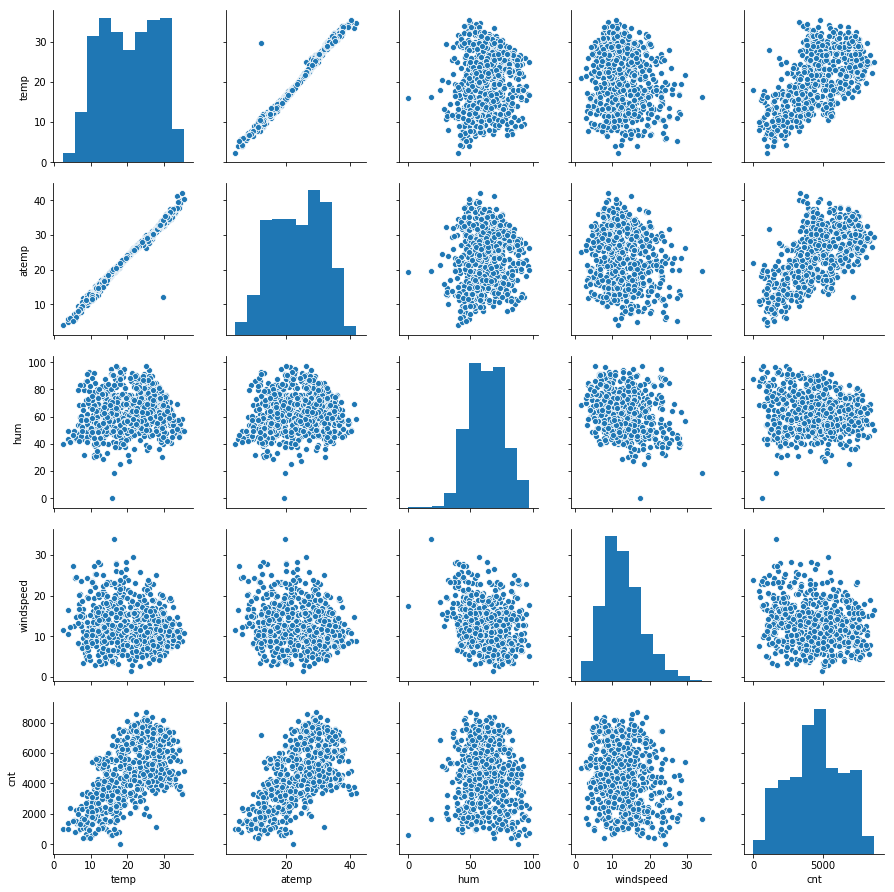

In [20]:
# Creating pairplots of numeric variables vs "cnt"
plt.figure(figsize = [20,12])
sns.pairplot(bike[num_vars])
plt.show()

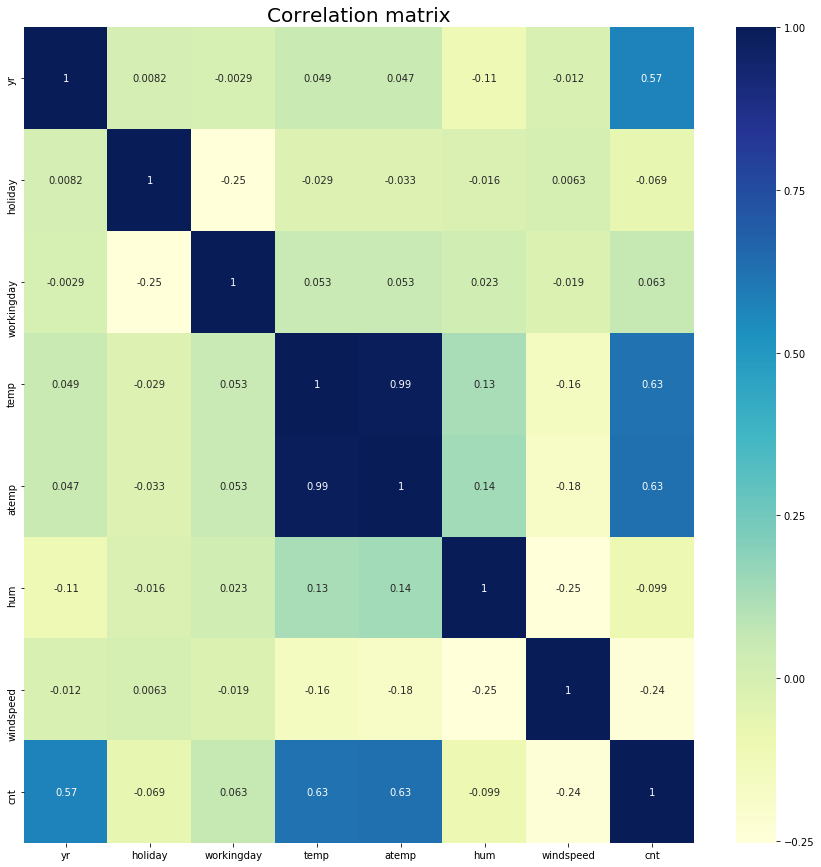

In [21]:
# Checking the heatmap
plt.figure(figsize = (15,15))
sns.heatmap(bike.corr(),annot=True,cmap = 'YlGnBu')
plt.title("Correlation matrix", fontsize = 20)
plt.show()

#### Observations:
- As can be expected, there is a strong correlation between actual temperature (temp) and the temperature felt (atemp). One of these variables will be dropped. Since "atemp" is derived from "temp", humidity and windspeed, it is better to drop this one. We shall keep the actual temperature (temp), which is a real measurement rather than a derived variable.
- From the pairplots, it is also evident that the demand for bike shares has some correlation with the temperature.

### Visualizing categorical variables

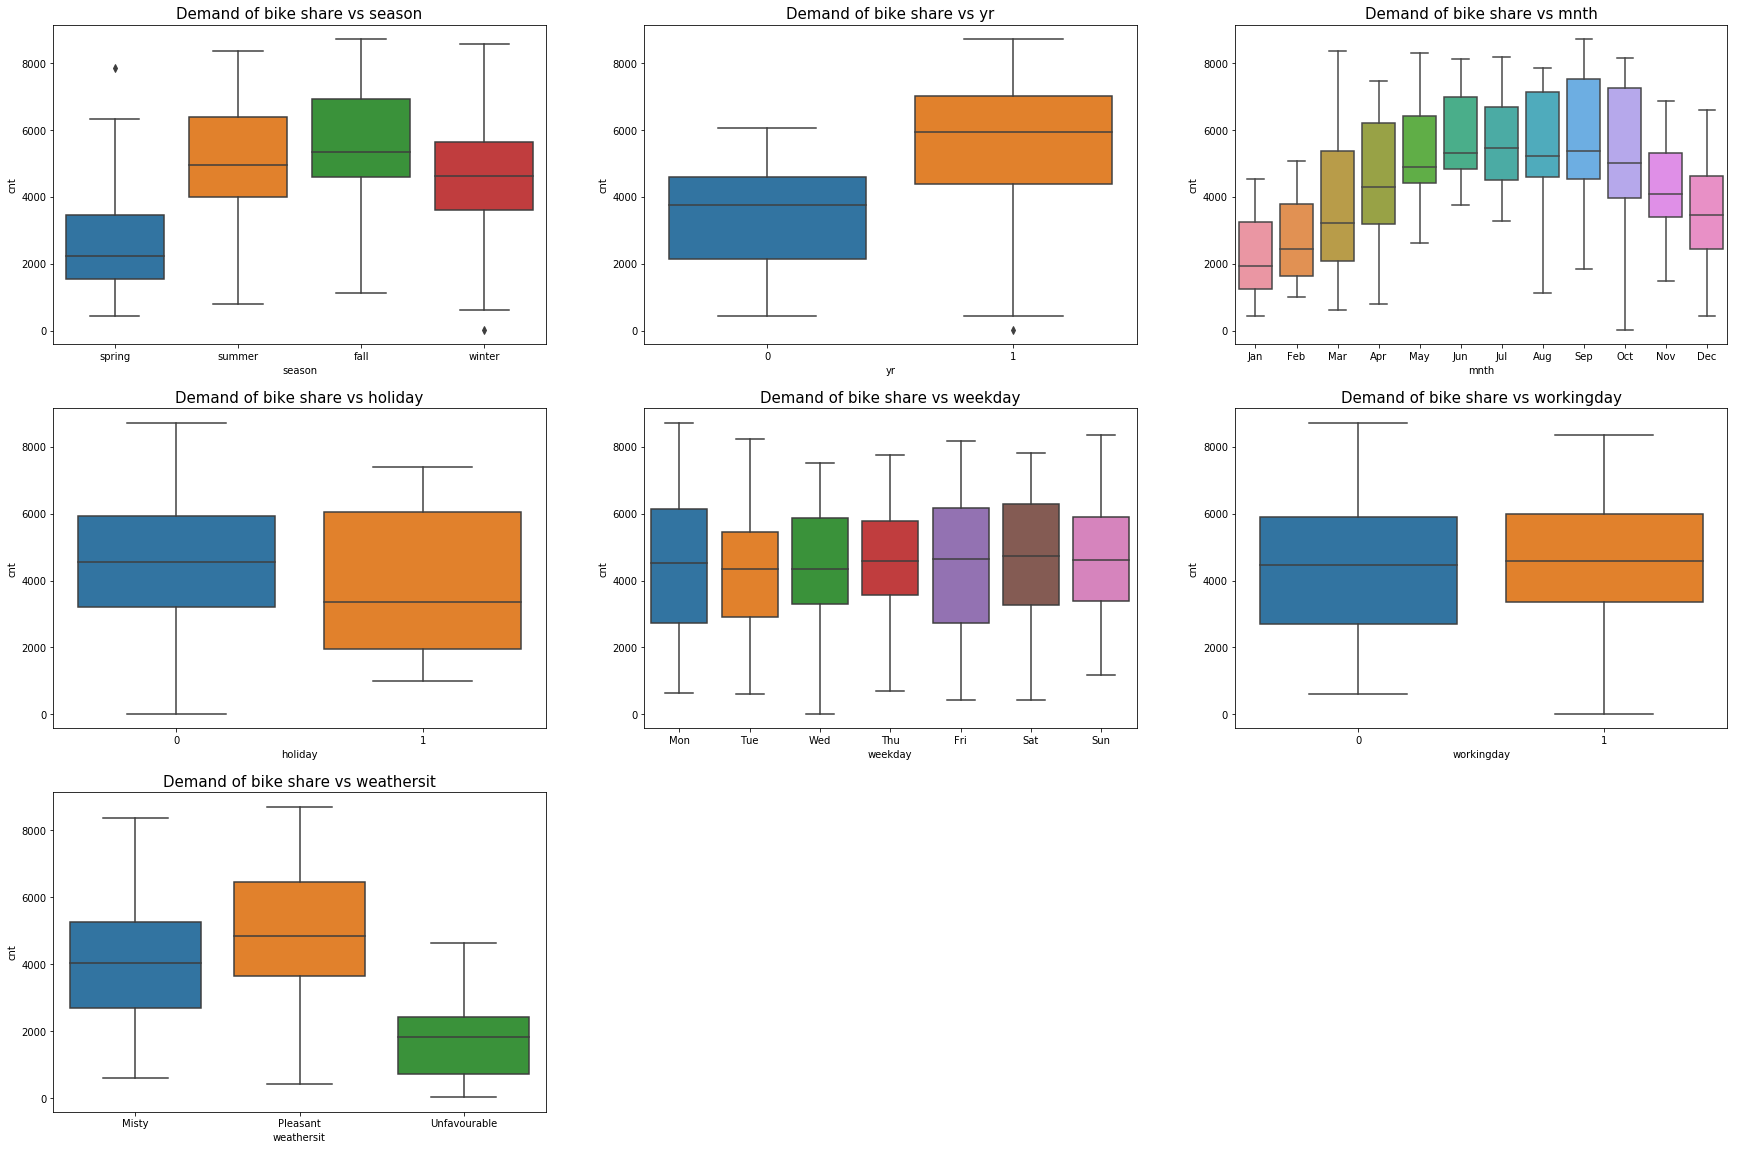

In [22]:
# Using a loop to display all boxplots for categorical variables
i=1
plt.figure(figsize = (30,20))
for var in cat_vars:
    plt.subplot(3,3,i)
    i+=1
    sns.boxplot(x = var, y = "cnt", data = bike)
    plt.title("Demand of bike share vs " + str(var), fontsize = 15)
plt.show()

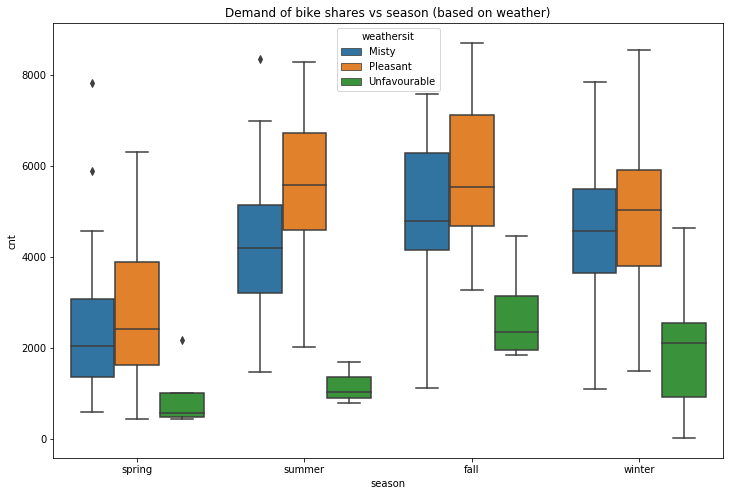

In [23]:
# Boxplot of demand vs season based on weather
plt.figure(figsize = (12,8))
sns.boxplot(x = "season", y = "cnt", data = bike, hue="weathersit")
plt.title("Demand of bike shares vs season (based on weather)")
plt.show()

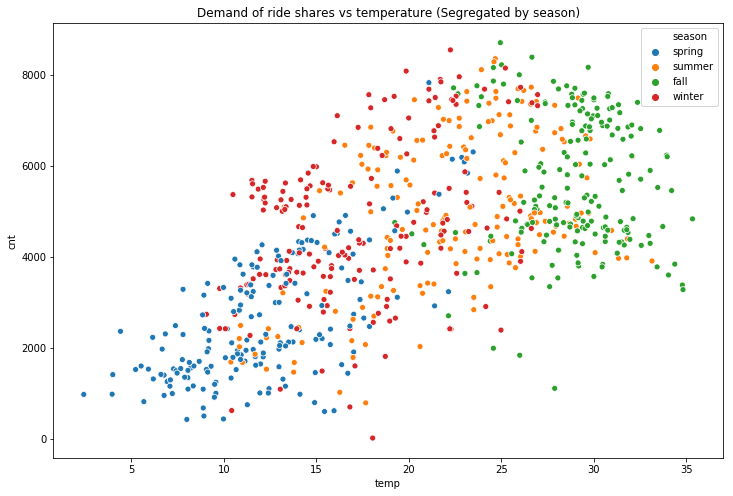

In [24]:
# Scatterplot of demand vs temperature by season
plt.figure(figsize = (12,8))
sns.scatterplot(x = "temp", y = "cnt", data = bike, hue="season")
plt.title("Demand of ride shares vs temperature (Segregated by season)")
plt.show()

#### Observations:
- The number of rides increases in summer and fall. There is significant reduction in the number of shared rides in the "spring" season. 
- One suspects that the seasons' definitions are incorrect based on the above scatterplot segregated by season. The temperatures corresponding to "spring" are the lowest and should actually be winter. Similarly, the temperatures during "fall" are the highest, while this should be summer. We shall, however, ignore this discrepancy in definition.
- There is an increase in rides year-on-year from 2018 to 2019.
- As with the seasons, the number of rides increases from Apr - Oct while decreasing for other months. One would intuitively expect a correlation with average temperature, which we shall verify later on.
- The ridership decreases significantly on holidays (like Christmas, Easter, etc.)
- The number of rides stays fairly similar for all days of the week. If anything, there is a slight decrease on weekends (defined by Mon & Tue for our dataset.)
- The ridership decreases significantly when the weather is unfavourable. It seems there are almost no riders when there is inclement (severe) weather.

In [25]:
bike.weathersit.value_counts()

Pleasant        463
Misty           246
Unfavourable     21
Name: weathersit, dtype: int64

In [26]:
# Dropping atemp variable, due to its high correlation with temp.
bike.drop("atemp",axis=1,inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,Misty,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,0,Misty,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Pleasant,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Pleasant,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Pleasant,9.305237,43.6957,12.522300,1600


In [27]:
bike.shape

(730, 11)

In [28]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(3), int64(4), object(4)
memory usage: 62.8+ KB


## Data preparation

### Encoding of categorical variables

All binary categorical variables have already been encoded with 0/1. Let's encode non-binary categorical variables with dummy variables.

In [29]:
# Creating a list of non-binary categorical variables.
non_bin_cat_vars = ['season', 'mnth', 'weekday', 'weathersit']

# Creating a dataframe of all dummy variables.
dummy = pd.get_dummies(bike[non_bin_cat_vars], drop_first = True)
dummy.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Pleasant,weathersit_Unfavourable
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
dummy.shape

(730, 22)

Total 22 dummy variables created.

Season - 3;
Month - 11;
Weekdays - 6;
Weather situation - 2

In [31]:
#Merging original dataframe with the dummy variables
bike_master = pd.concat([bike,dummy],axis=1)
bike_master.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Pleasant,weathersit_Unfavourable
0,spring,0,Jan,0,Mon,0,Misty,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Tue,0,Misty,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,0
2,spring,0,Jan,0,Wed,1,Pleasant,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,1,0
3,spring,0,Jan,0,Thu,1,Pleasant,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,1,0
4,spring,0,Jan,0,Fri,1,Pleasant,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,1,0


In [32]:
bike_master.shape

(730, 33)

In [33]:
#Dropping all remaining categorical variables
bike_master.drop(non_bin_cat_vars, axis=1, inplace=True)
bike_master.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Pleasant,weathersit_Unfavourable
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [34]:
bike_master.shape

(730, 29)

### Splitting training and test datasets

In [35]:
# Import relevant library
from sklearn.model_selection import train_test_split

In [36]:
# Splitting into training and test datasets with a ratio of 70% : 30%
df_train, df_test = train_test_split(bike_master, train_size = 0.7, random_state = 100)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [37]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [38]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Pleasant,weathersit_Unfavourable
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,1,0,0,0,0,0,0,0
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,1,0,1,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,1,0,0,0,0,0,0,0
111,0,0,1,13.803347,72.9583,14.707907,1683,0,1,0,...,0,0,0,0,1,0,0,0,0,0


### Rescaling of purely numeric continuous variables (Not including categorical variables)

In [39]:
num_vars

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [40]:
num_vars.remove("atemp")
num_vars

['temp', 'hum', 'windspeed', 'cnt']

The 4 purely numeric variables have different scales and hence their comparison would be rather difficult. It is better to bring them to the same scale such that
- relavant coefficients obtained are comparable
- faster processing of the algorithms

In [41]:
# Importing relevant library
from sklearn.preprocessing import MinMaxScaler

In [42]:
# Assigning Normalization object
scalar = MinMaxScaler()

# Applying normalization
df_train[num_vars] = scalar.fit_transform(df_train[num_vars])

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [43]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Pleasant,weathersit_Unfavourable
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [44]:
df_train[num_vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


The 4 continuous variables have now been normalized and range between 0 and 1.

## Building models

In [45]:
# Importing relevant libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [46]:
# Assigning X_train and y_train dataframes
y_train = df_train.pop('cnt')
X_train = df_train
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Pleasant,weathersit_Unfavourable
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [47]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

### Defining functions for model creation using statsmodels and for VIF calculation.

In [49]:
# Function to create a linear regression model using "statsmodel". 
# Takes X_train and y_train dataframes as arguments and returns the linear regression model.
def sm_model(X,y):
    X_sm = sm.add_constant(X)
    lr = sm.OLS(y,X_sm)
    lr_model = lr.fit()
    return lr_model

In [54]:
# Function to calculate Variance Inflation Factor for all independent variables to check for multicolinearity.
# Takes all independent variables as a dataframe and returns the VIF in descending order
def vif_calc(X):
    vif=pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif["VIF"] = round(vif["VIF"],3)
    vif = vif.sort_values(by="VIF", ascending = False)
    print(vif)
    return vif

### Model 1: All variables included (manual)

In [51]:
model1 = sm_model(X_train,y_train)

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [52]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 05 May 2021   Prob (F-statistic):          3.00e-181
Time:                        16:58:43   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1933      0.038      5.129      0.000       0.119       0.267
yr                          0.2324      0.008     28.819      0.000       0.217       0.248
holiday                    -0.0052      0.024     -0.211      0.833      -0.053       0.043
workingday                  0.0810      0.012      6.530      0.000       0.057       0.105
temp                        0.4454      0.046      9.628      0.000       0.354       0.536
hum                        -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed                  -0.1860      0.026     -7.226      0.000      -0.237      -0.135
season_spring              -0.0448      0.030     -1.496      0.135      -0.104       0.014
season_summer               0.0430      0.026      1.645      0.101      -0.008       0.094
season_winter               0.1076      0.028      3.853      0.000       0.053       0.163
mnth_Aug                    0.0204      0.034      0.607      0.544      -0.046       0.086
mnth_Dec                   -0.0443      0.034     -1.317      0.189      -0.110       0.022
mnth_Feb                   -0.0324      0.033     -0.985      0.325      -0.097       0.032
mnth_Jan                   -0.0633      0.034     -1.885      0.060      -0.129       0.003
mnth_Jul                   -0.0338      0.035     -0.969      0.333      -0.102       0.035
mnth_Jun                    0.0046      0.025      0.186      0.853      -0.044       0.053
mnth_Mar                    0.0013      0.025      0.052      0.959      -0.047       0.050
mnth_May                    0.0247      0.021      1.173      0.241      -0.017       0.066
mnth_Nov                   -0.0399      0.036     -1.096      0.274      -0.111       0.032
mnth_Oct                    0.0075      0.036      0.210      0.834      -0.063       0.078
mnth_Sep                    0.0859      0.032      2.692      0.007       0.023       0.149
weekday_Mon                 0.0858      0.014      6.226      0.000       0.059       0.113
weekday_Sat                -0.0036      0.015     -0.248      0.804      -0.032       0.025
weekday_Sun                 0.0055      0.015      0.368      0.713      -0.024       0.035
weekday_Thu                -0.0124      0.015     -0.844      0.399      -0.041       0.017
weekday_Tue                 0.0316      0.014      2.234      0.026       0.004       0.059
weekday_Wed                -0.0154      0.015     -1.057      0.291      -0.044       0.013
weathersit_Pleasant         0.0596      0.010      5.709      0.000       0.039       0.080
weathersit_Unfavourable    -0.1963      0.025     -7.850      0.000      -0.245      -0.147
==============================================================================
Omnibus:                       83.722   Durbin-Watson:      

In [55]:
vif1 = vif_calc(X_train)

                   Features     VIF
2                workingday  97.405
20              weekday_Mon  22.082
24              weekday_Tue  20.756
6             season_spring  10.748
8             season_winter   9.441
7             season_summer   8.265
3                      temp   7.084
17                 mnth_Nov   6.788
18                 mnth_Oct   6.467
9                  mnth_Aug   6.358
12                 mnth_Jan   5.901
10                 mnth_Dec   5.677
13                 mnth_Jul   5.600
1                   holiday   5.017
19                 mnth_Sep   4.899
11                 mnth_Feb   4.390
15                 mnth_Mar   3.471
14                 mnth_Jun   2.812
16                 mnth_May   2.221
4                       hum   2.052
25              weekday_Wed   1.779
26      weathersit_Pleasant   1.657
21              weekday_Sat   1.617
23              weekday_Thu   1.610
22              weekday_Sun   1.609
5                 windspeed   1.240
27  weathersit_Unfavourable 

#### The above model 1 was run just to get a feel for the possible fitting. With 28 independent variables, there is a very real chance of overfitting. In addition, several variables show low significance (high p-value), indicating not all variables contribute much to the model.

#### Hence, we shall first use an automatic approach using Recursive Feature Elimination (RFE) in the next model to perform a coarse feature selection.

### Model 2 - Using Recursive Feature Elimination (RFE)

In [56]:
#Fitting the training data.
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
# Performing RFE with 18 variables.
rfe = RFE(lm,18)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=18, step=1, verbose=0)

In [58]:
# Check variables ranked by RFE method
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 3),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 9),
 ('mnth_Mar', False, 11),
 ('mnth_May', False, 2),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 8),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 10),
 ('weekday_Sun', False, 7),
 ('weekday_Thu', False, 6),
 ('weekday_Tue', False, 4),
 ('weekday_Wed', False, 5),
 ('weathersit_Pleasant', True, 1),
 ('weathersit_Unfavourable', True, 1)]

In [59]:
# Create list of columns to retain in the training dataset.
cols_to_keep = list(X_train.columns[rfe.support_])
print(cols_to_keep)

['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep', 'weekday_Mon', 'weathersit_Pleasant', 'weathersit_Unfavourable']


In [60]:
# Create new dataframe for training dataset including only the recommended variables from RFE
X_train_rfe = X_train[cols_to_keep]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weekday_Mon,weathersit_Pleasant,weathersit_Unfavourable
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,1,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1,0,0
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,0,0


In [61]:
# Check significance of variables with this training dataset
model2 = sm_model(X_train_rfe,y_train)

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [62]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Wed, 05 May 2021   Prob (F-statistic):          9.80e-190
Time:                        17:01:09   Log-Likelihood:                 524.48
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2283      0.041      5.586      0.000       0.148       0.309
yr                          0.2312      0.008     29.052      0.000       0.216       0.247
holiday                    -0.0500      0.027     -1.855      0.064      -0.103       0.003
workingday                  0.0442      0.011      3.860      0.000       0.022       0.067
temp                        0.4616      0.038     12.262      0.000       0.388       0.536
hum                        -0.1477      0.037     -3.958      0.000      -0.221      -0.074
windspeed                  -0.1889      0.025     -7.441      0.000      -0.239      -0.139
season_spring              -0.0515      0.022     -2.373      0.018      -0.094      -0.009
season_summer               0.0393      0.015      2.586      0.010       0.009       0.069
season_winter               0.1021      0.018      5.752      0.000       0.067       0.137
mnth_Dec                   -0.0474      0.018     -2.619      0.009      -0.083      -0.012
mnth_Feb                   -0.0334      0.021     -1.562      0.119      -0.075       0.009
mnth_Jan                   -0.0634      0.021     -2.991      0.003      -0.105      -0.022
mnth_Jul                   -0.0515      0.018     -2.868      0.004      -0.087      -0.016
mnth_Nov                   -0.0444      0.019     -2.371      0.018      -0.081      -0.008
mnth_Sep                    0.0723      0.017      4.346      0.000       0.040       0.105
weekday_Mon                 0.0540      0.014      3.743      0.000       0.026       0.082
weathersit_Pleasant         0.0585      0.010      5.668      0.000       0.038       0.079
weathersit_Unfavourable    -0.1982      0.025     -8.054      0.000      -0.247      -0.150
==============================================================================
Omnibus:                       80.597   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.714
Skew:                          -0.784   Prob(JB):                     3.91e-47
Kurtosis:                       5.757   Cond. No.                         25.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With 13 variables omitted using the RFE method, the adjusted R-squared value pf 0.846 is better for model 2 as compared with model 1. All the variables in model 2 also show high significance (low p-value) except "mnth_Feb"

Let's now check for multicolinearity using VIF

In [63]:
# Checking VIF
vif2 = vif_calc(X_train_rfe)

                   Features     VIF
4                       hum  27.057
3                      temp  23.271
6             season_spring   6.043
2                workingday   5.383
5                 windspeed   4.771
8             season_winter   4.369
16      weathersit_Pleasant   3.598
7             season_summer   3.063
11                 mnth_Jan   2.438
0                        yr   2.093
15              weekday_Mon   1.995
10                 mnth_Feb   1.938
13                 mnth_Nov   1.908
9                  mnth_Dec   1.731
12                 mnth_Jul   1.603
14                 mnth_Sep   1.428
1                   holiday   1.207
17  weathersit_Unfavourable   1.165


In [64]:
# Omitting "mnth_Feb" from the predictor variables due to its relatively low significance
X_train2=X_train_rfe.drop("mnth_Feb",axis=1)
X_train2.shape

(510, 17)

In [65]:
X_train2.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weekday_Mon,weathersit_Pleasant,weathersit_Unfavourable
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,1,0,0
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,0


### Model 3 - Using X_train2 with 17 predictor variables

In [66]:
model3 = sm_model(X_train2,y_train)
model3.summary()

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Wed, 05 May 2021   Prob (F-statistic):          2.52e-190
Time:                        17:04:14   Log-Likelihood:                 523.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -934.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2173      0.040      5.390      0.000       0.138       0.297
yr                          0.2309      0.008     28.978      0.000       0.215       0.247
holiday                    -0.0520      0.027     -1.931      0.054      -0.105       0.001
workingday                  0.0444      0.011      3.870      0.000       0.022       0.067
temp                        0.4764      0.036     13.064      0.000       0.405       0.548
hum                        -0.1494      0.037     -4.001      0.000      -0.223      -0.076
windspeed                  -0.1879      0.025     -7.390      0.000      -0.238      -0.138
season_spring              -0.0607      0.021     -2.899      0.004      -0.102      -0.020
season_summer               0.0424      0.015      2.809      0.005       0.013       0.072
season_winter               0.1038      0.018      5.845      0.000       0.069       0.139
mnth_Dec                   -0.0388      0.017     -2.248      0.025      -0.073      -0.005
mnth_Jan                   -0.0455      0.018     -2.548      0.011      -0.081      -0.010
mnth_Jul                   -0.0524      0.018     -2.916      0.004      -0.088      -0.017
mnth_Nov                   -0.0399      0.019     -2.152      0.032      -0.076      -0.003
mnth_Sep                    0.0737      0.017      4.430      0.000       0.041       0.106
weekday_Mon                 0.0548      0.014      3.794      0.000       0.026       0.083
weathersit_Pleasant         0.0583      0.010      5.637      0.000       0.038       0.079
weathersit_Unfavourable    -0.1972      0.025     -8.004      0.000      -0.246      -0.149
==============================================================================
Omnibus:                       76.194   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.529
Skew:                          -0.745   Prob(JB):                     2.85e-44
Kurtosis:                       5.687   Cond. No.                         24.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# Checking VIF
vif3 = vif_calc(X_train2)

                   Features     VIF
4                       hum  26.353
3                      temp  22.386
2                workingday   5.375
6             season_spring   5.113
5                 windspeed   4.763
8             season_winter   4.369
15      weathersit_Pleasant   3.563
7             season_summer   3.051
0                        yr   2.089
14              weekday_Mon   1.995
12                 mnth_Nov   1.878
10                 mnth_Jan   1.777
11                 mnth_Jul   1.599
9                  mnth_Dec   1.598
13                 mnth_Sep   1.427
1                   holiday   1.202
16  weathersit_Unfavourable   1.164


While the p-values indicate we should remove the variable "holiday", it is more intuitive to remove "mnth_Nov" from the equation, because one would assume that holidays would play a role (possibly inversely) in the bike ridership.

In [68]:
X_train3 = X_train2.drop("mnth_Nov", axis=1)
X_train3.shape

(510, 16)

### Model 4

In [69]:
model4 = sm_model(X_train3,y_train)
model4.summary()

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.1
Date:                Wed, 05 May 2021   Prob (F-statistic):          1.87e-190
Time:                        17:04:43   Log-Likelihood:                 520.83
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     493   BIC:                            -935.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.2021      0.040      5.074      0.000       0.124       0.280
yr                          0.2307      0.008     28.850      0.000       0.215       0.246
holiday                    -0.0589      0.027     -2.193      0.029      -0.112      -0.006
workingday                  0.0438      0.012      3.809      0.000       0.021       0.066
temp                        0.4963      0.035     14.012      0.000       0.427       0.566
hum                        -0.1503      0.037     -4.010      0.000      -0.224      -0.077
windspeed                  -0.1890      0.026     -7.407      0.000      -0.239      -0.139
season_spring              -0.0525      0.021     -2.541      0.011      -0.093      -0.012
season_summer               0.0480      0.015      3.214      0.001       0.019       0.077
season_winter               0.0943      0.017      5.462      0.000       0.060       0.128
mnth_Dec                   -0.0241      0.016     -1.514      0.131      -0.055       0.007
mnth_Jan                   -0.0406      0.018     -2.281      0.023      -0.075      -0.006
mnth_Jul                   -0.0523      0.018     -2.900      0.004      -0.088      -0.017
mnth_Sep                    0.0793      0.016      4.805      0.000       0.047       0.112
weekday_Mon                 0.0547      0.014      3.772      0.000       0.026       0.083
weathersit_Pleasant         0.0573      0.010      5.532      0.000       0.037       0.078
weathersit_Unfavourable    -0.1939      0.025     -7.856      0.000      -0.242      -0.145
==============================================================================
Omnibus:                       70.435   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.695
Skew:                          -0.709   Prob(JB):                     1.16e-38
Kurtosis:                       5.491   Cond. No.                         24.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value of "mnth_Dec" is quite large from the above model and it is a candidate for omission in the next iteration.

In [70]:
# Checking VIF
vif4 = vif_calc(X_train3)

                   Features     VIF
4                       hum  25.807
3                      temp  21.542
2                workingday   5.345
6             season_spring   5.053
5                 windspeed   4.720
8             season_winter   3.849
14      weathersit_Pleasant   3.502
7             season_summer   3.014
0                        yr   2.087
13              weekday_Mon   1.990
10                 mnth_Jan   1.759
11                 mnth_Jul   1.598
12                 mnth_Sep   1.401
9                  mnth_Dec   1.370
1                   holiday   1.180
15  weathersit_Unfavourable   1.157


In [71]:
# Dropping "mnth_Dec" from the variables
X_train4 = X_train3.drop("mnth_Dec",axis=1)
X_train4.shape

(510, 15)

### Model 5 - Using 15 variables in X_train4

In [72]:
model5 = sm_model(X_train4,y_train)
model5.summary()

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 05 May 2021   Prob (F-statistic):          4.22e-191
Time:                        17:05:01   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1956      0.040      4.932      0.000       0.118       0.273
yr                          0.2305      0.008     28.795      0.000       0.215       0.246
holiday                    -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday                  0.0433      0.012      3.762      0.000       0.021       0.066
temp                        0.5096      0.034     14.837      0.000       0.442       0.577
hum                        -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed                  -0.1863      0.025     -7.310      0.000      -0.236      -0.136
season_spring              -0.0509      0.021     -2.464      0.014      -0.091      -0.010
season_summer               0.0508      0.015      3.423      0.001       0.022       0.080
season_winter               0.0933      0.017      5.403      0.000       0.059       0.127
mnth_Jan                   -0.0345      0.017     -1.989      0.047      -0.069      -0.000
mnth_Jul                   -0.0529      0.018     -2.931      0.004      -0.088      -0.017
mnth_Sep                    0.0814      0.016      4.945      0.000       0.049       0.114
weekday_Mon                 0.0536      0.014      3.694      0.000       0.025       0.082
weathersit_Pleasant         0.0563      0.010      5.439      0.000       0.036       0.077
weathersit_Unfavourable    -0.1911      0.025     -7.755      0.000      -0.240      -0.143
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         24.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The adjusted R-squared value is 0.844, same as what we had with all variables in model 1. 
All the variables considered have a p-value of < 0.05, thereby showing some degree of significance.
Let's now check for multicolinearity with VIF.

In [73]:
# Checking multicolinearity with VIF
vif5 = vif_calc(X_train4)

                   Features     VIF
4                       hum  24.607
3                      temp  20.446
2                workingday   5.323
6             season_spring   5.053
5                 windspeed   4.716
8             season_winter   3.815
13      weathersit_Pleasant   3.446
7             season_summer   2.990
0                        yr   2.086
12              weekday_Mon   1.978
9                  mnth_Jan   1.681
10                 mnth_Jul   1.597
11                 mnth_Sep   1.394
1                   holiday   1.180
14  weathersit_Unfavourable   1.149


#### Humidity (hum) seems to be highly collinear with other variables and is a candidate for omission.

In [74]:
# Dropping "hum" due to its high multicolinearity with other variables.
X_train5=X_train4.drop("hum",axis =1)
X_train5.shape

(510, 14)

### Model 6 - Using X_train5 with 14 predictor variables

In [75]:
model6 = sm_model(X_train5,y_train)
model6.summary()

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 05 May 2021   Prob (F-statistic):          1.60e-188
Time:                        17:05:29   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0924      0.032      2.925      0.004       0.030       0.154
yr                          0.2345      0.008     29.009      0.000       0.219       0.250
holiday                    -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday                  0.0464      0.012      3.966      0.000       0.023       0.069
temp                        0.4722      0.034     14.005      0.000       0.406       0.538
windspeed                  -0.1563      0.025     -6.286      0.000      -0.205      -0.107
season_spring              -0.0599      0.021     -2.867      0.004      -0.101      -0.019
season_summer               0.0445      0.015      2.967      0.003       0.015       0.074
season_winter               0.0784      0.017      4.562      0.000       0.045       0.112
mnth_Jan                   -0.0392      0.018     -2.227      0.026      -0.074      -0.005
mnth_Jul                   -0.0479      0.018     -2.614      0.009      -0.084      -0.012
mnth_Sep                    0.0755      0.017      4.527      0.000       0.043       0.108
weekday_Mon                 0.0583      0.015      3.968      0.000       0.029       0.087
weathersit_Pleasant         0.0813      0.009      9.437      0.000       0.064       0.098
weathersit_Unfavourable    -0.2095      0.025     -8.499      0.000      -0.258      -0.161
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         21.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The adjusted R-squared value is still around 0.84 which is good. Let's check for multicolinearity again.

In [76]:
vif6 = vif_calc(X_train5)

                   Features    VIF
3                      temp  7.837
2                workingday  5.193
4                 windspeed  4.700
5             season_spring  3.186
12      weathersit_Pleasant  2.839
6             season_summer  2.323
0                        yr  2.076
7             season_winter  1.991
11              weekday_Mon  1.958
8                  mnth_Jan  1.612
9                  mnth_Jul  1.597
10                 mnth_Sep  1.339
1                   holiday  1.176
13  weathersit_Unfavourable  1.119


#### We see that temperature (temp) has a high multicolinearity, possibly with seasons and months of the year. However, the high coefficient of 0.4722 indicates that this is an important predictor variable with high significance. Hence, we shall make the judgement call to not omit this variable.

We can omit "workingday" to see how that affects the model.

In [77]:
# Dropping "workingday"
X_train6 = X_train5.drop("workingday",axis=1)
X_train6.shape

(510, 13)

### Model 7 - Using X_train6

In [78]:
model7 = sm_model(X_train6,y_train)
model7.summary()

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Wed, 05 May 2021   Prob (F-statistic):          2.48e-186
Time:                        17:06:16   Log-Likelihood:                 502.77
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     496   BIC:                            -918.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1326      0.030      4.369      0.000       0.073       0.192
yr                          0.2347      0.008     28.620      0.000       0.219       0.251
holiday                    -0.0934      0.026     -3.589      0.000      -0.144      -0.042
temp                        0.4734      0.034     13.837      0.000       0.406       0.541
windspeed                  -0.1570      0.025     -6.226      0.000      -0.207      -0.107
season_spring              -0.0615      0.021     -2.902      0.004      -0.103      -0.020
season_summer               0.0437      0.015      2.871      0.004       0.014       0.074
season_winter               0.0755      0.017      4.334      0.000       0.041       0.110
mnth_Jan                   -0.0386      0.018     -2.159      0.031      -0.074      -0.003
mnth_Jul                   -0.0508      0.019     -2.735      0.006      -0.087      -0.014
mnth_Sep                    0.0762      0.017      4.504      0.000       0.043       0.109
weekday_Mon                 0.0201      0.011      1.787      0.075      -0.002       0.042
weathersit_Pleasant         0.0794      0.009      9.097      0.000       0.062       0.097
weathersit_Unfavourable    -0.2065      0.025     -8.258      0.000      -0.256      -0.157
==============================================================================
Omnibus:                       66.209   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.692
Skew:                          -0.716   Prob(JB):                     1.03e-31
Kurtosis:                       5.160   Cond. No.                         19.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The only weekday remaining "weekday_mon" has popped up with a high p-value and is a candidate for removal.

In [79]:
#Checking VIF
vif7 = vif_calc(X_train6)

                   Features    VIF
2                      temp  5.829
3                 windspeed  4.662
4             season_spring  2.852
11      weathersit_Pleasant  2.839
5             season_summer  2.209
0                        yr  2.075
6             season_winter  1.790
7                  mnth_Jan  1.598
8                  mnth_Jul  1.596
9                  mnth_Sep  1.330
10              weekday_Mon  1.191
12  weathersit_Unfavourable  1.116
1                   holiday  1.049


As already mentioned earlier, we have made the judgement call to keep "temp" despite its slightly high VIF value. The adjusted R-square is still a respectable 0.834. 
We are going to drop the variable "weekday_Mon" due to its relatively high p-value.

In [80]:
# Dropping weekday_Mon
X_train7 = X_train6.drop("weekday_Mon", axis =1)
X_train7.shape

(510, 12)

### Model 8 - Using X_train7 with 12 variables remaining.

In [81]:
model8 = sm_model(X_train7,y_train)
model8.summary()

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Wed, 05 May 2021   Prob (F-statistic):          8.14e-187
Time:                        17:06:44   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1361      0.030      4.483      0.000       0.076       0.196
yr                          0.2343      0.008     28.517      0.000       0.218       0.250
holiday                    -0.0968      0.026     -3.722      0.000      -0.148      -0.046
temp                        0.4721      0.034     13.772      0.000       0.405       0.539
windspeed                  -0.1549      0.025     -6.135      0.000      -0.205      -0.105
season_spring              -0.0617      0.021     -2.905      0.004      -0.103      -0.020
season_summer               0.0434      0.015      2.845      0.005       0.013       0.073
season_winter               0.0757      0.017      4.335      0.000       0.041       0.110
mnth_Jan                   -0.0383      0.018     -2.138      0.033      -0.073      -0.003
mnth_Jul                   -0.0503      0.019     -2.706      0.007      -0.087      -0.014
mnth_Sep                    0.0764      0.017      4.506      0.000       0.043       0.110
weathersit_Pleasant         0.0793      0.009      9.067      0.000       0.062       0.096
weathersit_Unfavourable    -0.2061      0.025     -8.226      0.000      -0.255      -0.157
==============================================================================
Omnibus:                       59.886   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.021
Skew:                          -0.638   Prob(JB):                     4.79e-30
Kurtosis:                       5.174   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
# Checking Multicolinearity with VIF
vif8 = vif_calc(X_train7)

                   Features    VIF
2                      temp  5.799
3                 windspeed  4.640
4             season_spring  2.840
10      weathersit_Pleasant  2.839
5             season_summer  2.206
0                        yr  2.073
6             season_winter  1.776
7                  mnth_Jan  1.597
8                  mnth_Jul  1.596
9                  mnth_Sep  1.329
11  weathersit_Unfavourable  1.116
1                   holiday  1.043


#### We have now reached a satisfactory model with a respectable adjusted R-squared of 0.833 using 12 predictor variables.
- All of the variables have a reasonable degree of significance, with max p-value being 0.033
- All the variables have acceptable VIF of less than 5, barring "temp" which has a high coefficient in the model. Hence, keeping the "temp" variable in the model is a prudent choice.
- Having reduced the number of predictor variables from 28 to 12, it is likely that the risk of "overfitting" has been reduced while maintaining the goodness of the fit to the linear regression model.

In [83]:
X_train7.head()

,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,mnth_Jan,mnth_Jul,mnth_Sep,weathersit_Pleasant,weathersit_Unfavourable
576,1,0,0.815169,0.264686,0,0,0,0,1,0,1,0
426,1,0,0.442393,0.255342,1,0,0,0,0,0,0,0
728,1,0,0.245101,0.663106,1,0,0,0,0,0,1,0
482,1,0,0.395666,0.188475,0,1,0,0,0,0,0,0
111,0,0,0.345824,0.380981,0,1,0,0,0,0,0,0


In [84]:
# Adding a constant term to the training data because the model contains it.
X_train8 = sm.add_constant(X_train7)
X_train8.head()

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,mnth_Jan,mnth_Jul,mnth_Sep,weathersit_Pleasant,weathersit_Unfavourable
576,1.0,1,0,0.815169,0.264686,0,0,0,0,1,0,1,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,0,0,0
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0,0,1,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,0,0,0,0
111,1.0,0,0,0.345824,0.380981,0,1,0,0,0,0,0,0


 ## Residual Analysis

In [85]:
# Calculating y_train_pred using model8
y_train_pred = model8.predict(X_train8)

In [86]:
y_train_pred.head()

576    0.743176
426    0.478005
728    0.400968
482    0.571385
111    0.283748
dtype: float64

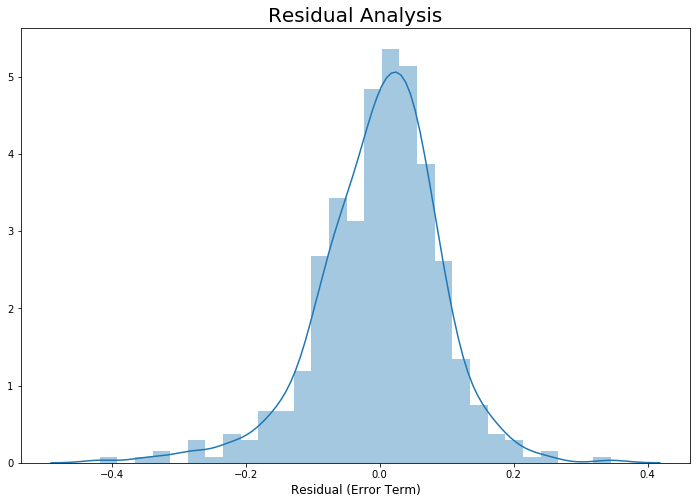

In [87]:
# Checking if error terms (residuals) follow a normal distribution with mean 0.
res = y_train - y_train_pred
plt.figure(figsize = (12,8))
sns.distplot(res)
plt.xlabel('Residual (Error Term)', fontsize = 12)
plt.title("Residual Analysis", fontsize = 20)
plt.show()

<Figure size 864x576 with 0 Axes>

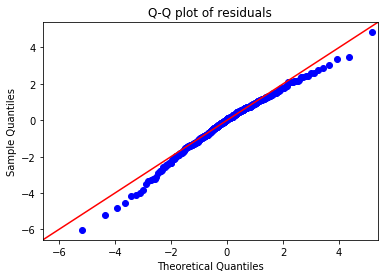

In [88]:
# Checking normal distribution of residuals
import scipy.stats as stats
plt.figure(figsize = (12,8))
sm.qqplot(res, stats.t, fit=True, line="45")
plt.title("Q-Q plot of residuals")
plt.show()

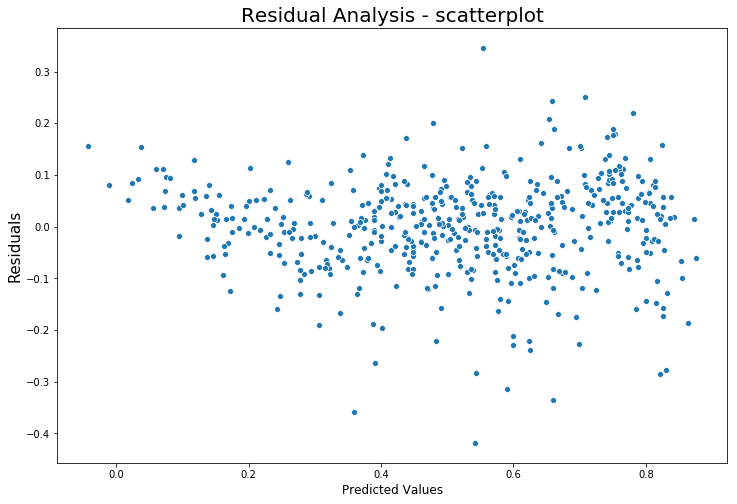

In [89]:
# Checking if error terms are independent
plt.figure(figsize = (12,8))
sns.scatterplot(x=y_train_pred, y=res)
plt.xlabel("Predicted Values", fontsize = 12)
plt.ylabel("Residuals", fontsize = 15)
plt.title("Residual Analysis - scatterplot", fontsize = 20)
plt.show()

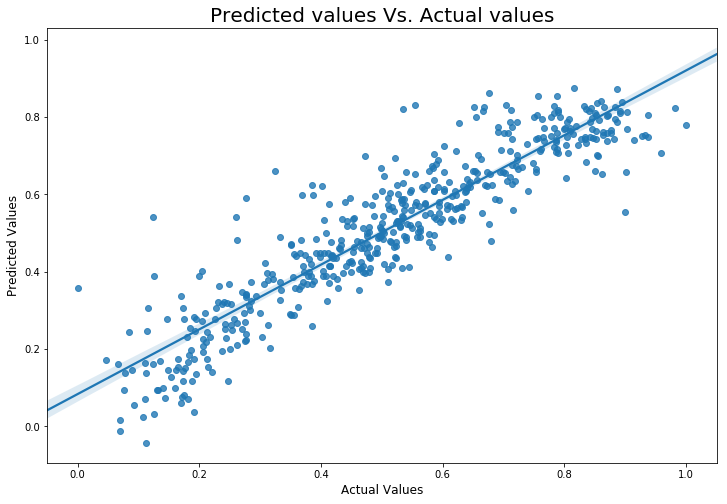

In [90]:
# Checking homoscedasticity (constant variance of error terms)
plt.figure(figsize = (12,8))
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted values Vs. Actual values', fontsize = 20)
plt.xlabel('Actual Values', fontsize = 12)
plt.ylabel('Predicted Values', fontsize = 12)
plt.show()

#### Conclusions:
- The error terms (residuals) follow a normal distribution with mean around 0 as seen in the histogram.
- The scatterplot between residuals vs predicted y-values shows that the error terms are independent of each other and do not follow any pattern 
- The scatterplot between Predicted values vs Actual values shows that the error terms have a constant variance.

This fulfils the assumptions about the error terms of a linear regression model.

## Prediction and Evaluation of the model using test data

### Data prep for test data - Replicate the tasks performed for training dataset

In [91]:
# Apply scaling
df_test[num_vars] = scalar.transform(df_test[num_vars])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [92]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Pleasant,weathersit_Unfavourable
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,0,1,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,0,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,1,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [93]:
df_test[num_vars].describe()

,temp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.638221,0.313293,0.522154
std,0.233187,0.148694,0.159584,0.219163
min,0.046591,0.261915,-0.042808,0.048205
25%,0.355429,0.529197,0.198843,0.378595
50%,0.558172,0.625590,0.300126,0.524678
75%,0.755981,0.743798,0.402718,0.677750
max,0.984424,1.002146,0.807474,0.963300


As can be seen above, the scaling for test data does not adhere to the min-max of 0-1. However, the scalar applied corresponds to the one applied to the training data for a like-to-like application.

In [94]:
# Creating y_test, X_test data frames
y_test = df_test.pop("cnt")
X_test = df_test
X_test.shape

(220, 28)

In [95]:
#Obtaining variables from the final training dataset (before addition of constant)
final_vars = list(X_train7.columns)
print(final_vars)

['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'mnth_Jan', 'mnth_Jul', 'mnth_Sep', 'weathersit_Pleasant', 'weathersit_Unfavourable']


In [96]:
X_test = X_test[final_vars]

In [97]:
X_test.head()

,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,mnth_Jan,mnth_Jul,mnth_Sep,weathersit_Pleasant,weathersit_Unfavourable
184,0,1,0.831783,0.084219,0,0,0,0,1,0,0,0
535,1,0,0.901354,0.153728,0,1,0,0,0,0,1,0
299,0,0,0.511964,0.334206,0,0,1,0,0,0,0,0
221,0,0,0.881625,0.339570,0,0,0,0,0,0,1,0
152,0,0,0.817246,0.537414,0,1,0,0,0,0,1,0


In [98]:
X_test.shape

(220, 12)

In [99]:
# Adding constant to replicate the model parameters
X_test = sm.add_constant(X_test)
X_test.head()

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,mnth_Jan,mnth_Jul,mnth_Sep,weathersit_Pleasant,weathersit_Unfavourable
184,1.0,0,1,0.831783,0.084219,0,0,0,0,1,0,0,0
535,1.0,1,0,0.901354,0.153728,0,1,0,0,0,0,1,0
299,1.0,0,0,0.511964,0.334206,0,0,1,0,0,0,0,0
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0,0,1,0
152,1.0,0,0,0.817246,0.537414,0,1,0,0,0,0,1,0


In [100]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

### Prediction

In [101]:
y_test_pred = model8.predict(X_test)
y_test_pred.head()

184    0.368660
535    0.894788
299    0.401701
221    0.579015
152    0.561357
dtype: float64

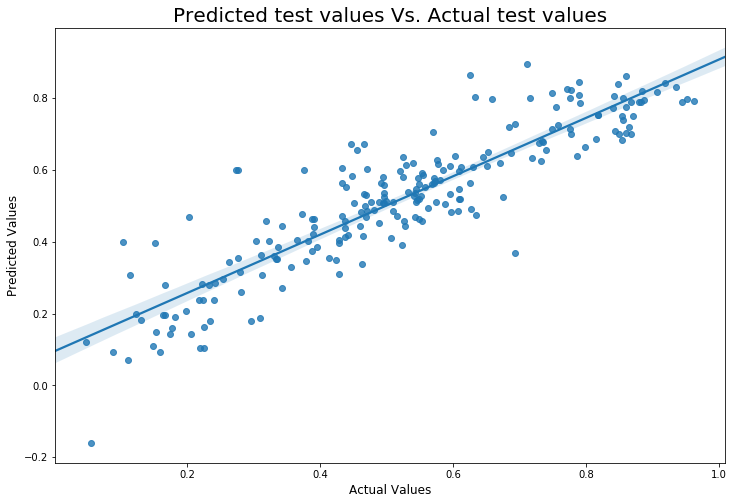

In [102]:
plt.figure(figsize = (12,8))
sns.regplot(x=y_test, y=y_test_pred)
plt.title('Predicted test values Vs. Actual test values', fontsize = 20)
plt.xlabel('Actual Values', fontsize = 12)
plt.ylabel('Predicted Values', fontsize = 12)
plt.show()

#### The plot above shows that the model selected provides a good match for the predicted values of the test data as compared to the actual test data.

### Evaluation of the model - Using r2_score of test data

In [103]:
# Import relevant library
from sklearn.metrics import r2_score

In [105]:
train_r2 = r2_score(y_true=y_train,y_pred=y_train_pred)
print("R-squared value for training data:", round(train_r2,4))

R-squared value for training data: 0.8368


In [106]:
test_r2 = r2_score(y_true=y_test,y_pred=y_test_pred)
print("R-squared value for test data:",round(test_r2,4))

R-squared value for test data: 0.8026


#### The r2 score for the test data is close to the value obtained for training data. This indicates that the model is fairly robust, has a good fit and is appropriate for further prediction.

## Final Equation for prediction of number of bike share rides based on the 12 final variables is below:

#### cnt_pred = (0.4721 x temp) + (0.2343 x yr) +((-0.2061) x weathersit_Unfavourable) + ((-0.1549) x windspeed) + ((-0.0968) x holiday) + ((-0.0617) x season_spring) + (0.0434 x season_summer) + (0.0757 x season_winter) + (0.0793 x weathersit_Pleasant) + ((-0.0383) x mnth_Jan) + ((-0.0503) x mnth_Jul + (0.0764) x mnth_Sep + 0.1361

#### Conclusions:
- There are several variables which affect the count of ride shares adversely such as unfavourable weather, high windspeed, holdays, etc.
- The top 4 variables affecting the count of ride shares on any given day are:
    - Temperature
    - Year (Presumably, the popularity increases year-on-year)
    - Unfavourable weather (Negative correlation)
    - Windspeed (Negative correlation)


End of Analysis